In [1]:
import sys
import pickle

sys.path.append("../src")


from plots_functions import (
    multiple_runs_with_uncertainty_band,
    multiple_runs_with_every_run,
)

In [2]:
experiment_dict = pickle.load(open("../results/regularization.pkl", "rb"))

In [3]:
for key, value in experiment_dict.items():
    print(f"key: {key}, value: {str(value)[:50]}")

key: experiment name, value: regularization
key: experiments metadata, value: all runs have 30 epochs, learning rate 0.01, each 
key: (0, 0), value: [{'train_loss': [1.9416542053222656, 1.57965338230
key: (0, 0.0001), value: [{'train_loss': [1.8840848207473755, 1.52414178848
key: (0, 0.001), value: [{'train_loss': [1.931786060333252, 1.566167354583
key: (0, 0.01), value: [{'train_loss': [1.9671764373779297, 1.73191213607
key: (0, 0.05), value: [{'train_loss': [2.3028738498687744, 2.30292272567
key: (0.25, 0), value: [{'train_loss': [1.9658715724945068, 1.56048440933
key: (0.25, 0.0001), value: [{'train_loss': [1.9592249393463135, 1.58980262279
key: (0.25, 0.001), value: [{'train_loss': [1.9142963886260986, 1.62372434139
key: (0.25, 0.01), value: [{'train_loss': [2.00071382522583, 1.7638671398162
key: (0.25, 0.05), value: [{'train_loss': [2.302802801132202, 2.302924156188
key: (0.5, 0), value: [{'train_loss': [1.969573736190796, 1.519928455352
key: (0.5, 0.0001), value: [{'train_loss': 

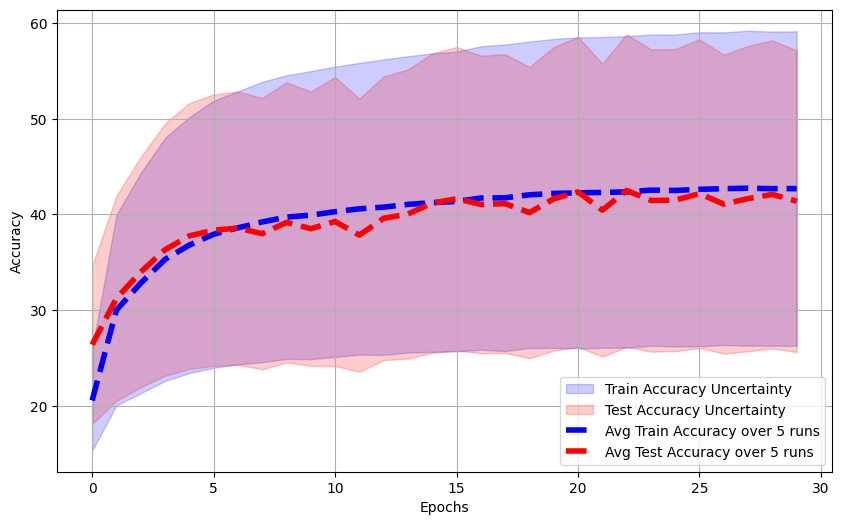

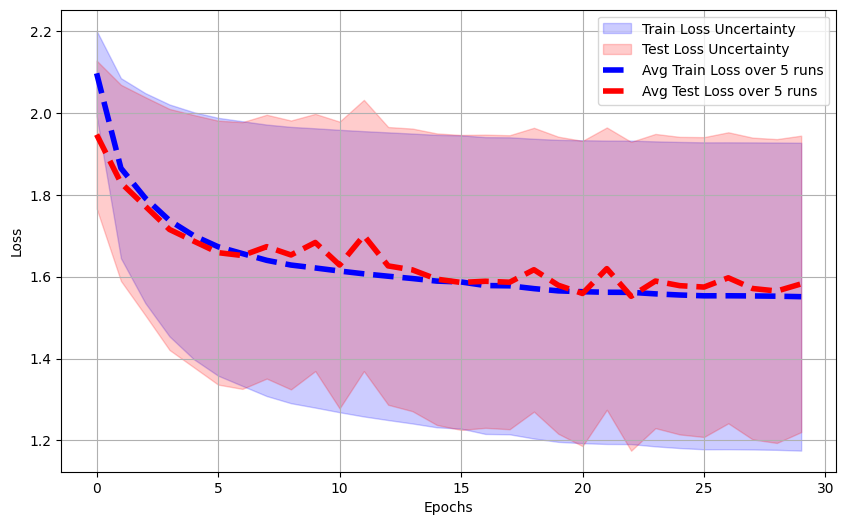

In [4]:
multiple_runs_with_uncertainty_band(experiment_dict[(0.75, 0.01)], "", "")

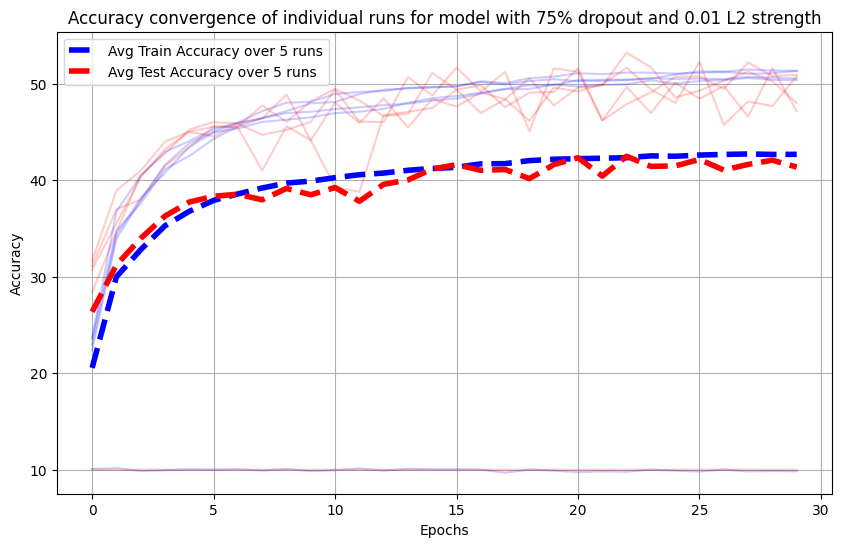

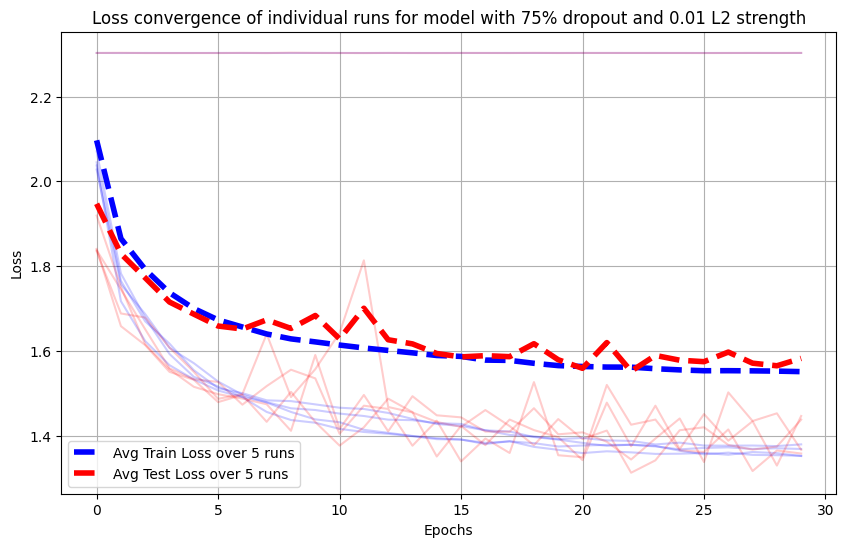

In [6]:
multiple_runs_with_every_run(
    experiment_dict[(0.75, 0.01)],
    "Accuracy convergence of individual runs for model with 75% dropout and 0.01 L2 strength",
    "Loss convergence of individual runs for model with 75% dropout and 0.01 L2 strength",
)

### Only for 50% dropout we got convergence with this high regularization strength  

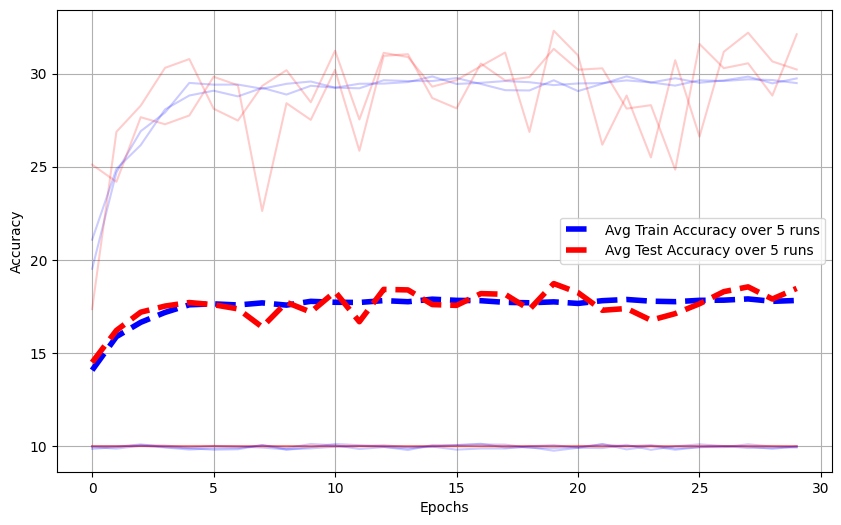

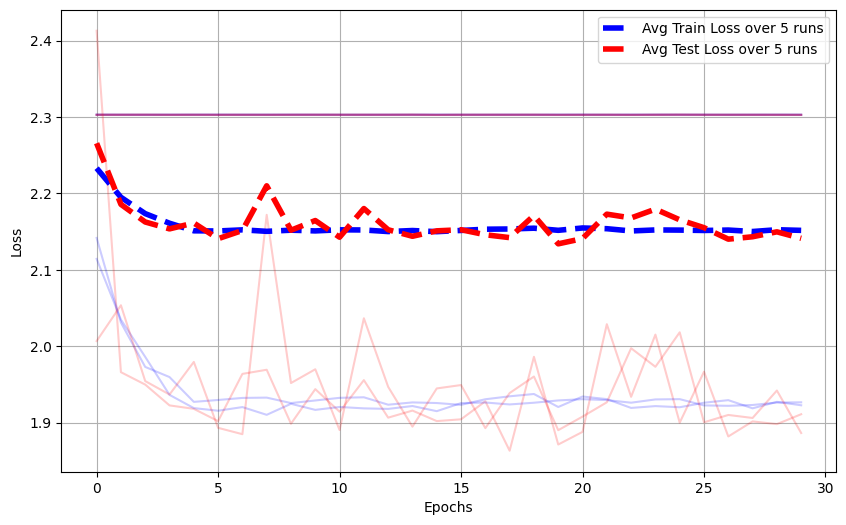

In [17]:
multiple_runs_with_every_run(experiment_dict[(0.5, 0.05)], "", "")

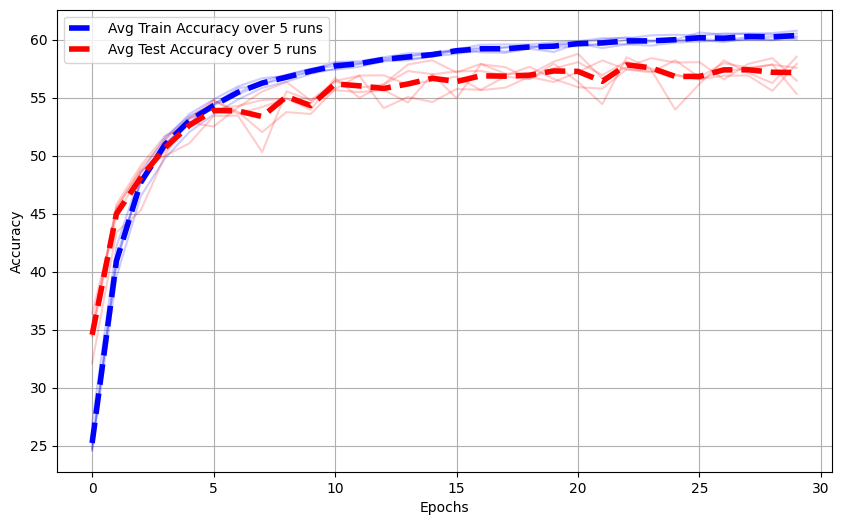

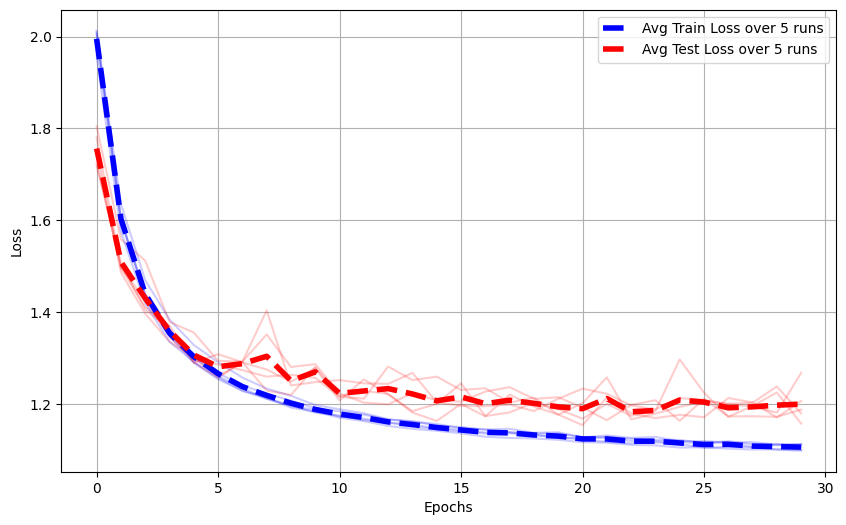

In [24]:
multiple_runs_with_every_run(experiment_dict[(0.75, 0.001)], "", "")

In [ ]:
def companion_of_means_with_different_parameters(
    metrics_list, title_accuracy, title_loss
):

    plt.figure(figsize=(10, 6))

    # Prepare lists of train and test accuracies for uncertainty bands
    train_acc_list = [metrics["train_acc"] for metrics in metrics_list]
    test_acc_list = [metrics["test_acc"] for metrics in metrics_list]
    epochs = len(train_acc_list[0])
    num_of_runs = len(train_acc_list)

    for i, metrics in enumerate(metrics_list):
        plt.plot(range(epochs), metrics["train_acc"], color="blue", alpha=0.2)
        plt.plot(range(epochs), metrics["test_acc"], color="red", alpha=0.2)

    # Calculate and plot average train accuracy
    avg_train_loss = np.mean([metrics["train_acc"] for metrics in metrics_list], axis=0)
    plt.plot(
        range(epochs),
        avg_train_loss,
        label=f"Avg Train Accuracy over {num_of_runs} runs",
        color="blue",
        linestyle="--",
        linewidth=4,
    )

    # Calculate and plot average test accuracy
    avg_test_loss = np.mean([metrics["test_acc"] for metrics in metrics_list], axis=0)
    plt.plot(
        range(epochs),
        avg_test_loss,
        label=f"Avg Test Accuracy over {num_of_runs} runs",
        color="red",
        linestyle="--",
        linewidth=4,
    )

    # Add title, labels, grid, legend
    plt.title(title_accuracy)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid(True)

    plt.show()

    plt.figure(figsize=(10, 6))

    train_loss_list = [metrics["train_loss"] for metrics in metrics_list]
    test_loss_list = [metrics["test_loss"] for metrics in metrics_list]

    for i, metrics in enumerate(metrics_list):
        plt.plot(range(epochs), metrics["train_loss"], color="blue", alpha=0.2)
        plt.plot(range(epochs), metrics["test_loss"], color="red", alpha=0.2)

    avg_train_loss = np.mean(
        [metrics["train_loss"] for metrics in metrics_list], axis=0
    )
    plt.plot(
        range(epochs),
        avg_train_loss,
        label=f"Avg Train Loss over {num_of_runs} runs",
        color="blue",
        linestyle="--",
        linewidth=4,
    )

    avg_test_loss = np.mean([metrics["test_loss"] for metrics in metrics_list], axis=0)
    plt.plot(
        range(epochs),
        avg_test_loss,
        label=f"Avg Test Loss over {num_of_runs} runs",
        color="red",
        linestyle="--",
        linewidth=4,
    )

    # Add title, labels, grid, legend
    plt.title(title_loss)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(loc="best")
    plt.grid(True)

    plt.show()